# Monte Carlo $\pi$

For this Exercise, we import some useful libraries to deal with mathematical operations and random numbers:

In [1]:
import random as r
import math as m
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import sys
sys.path.append("..")

# The Random Seed is set here, you will focus on it in the last question.
# For the moment it is sufficient to know that this is used to initialize
# the generation of random numbers (if not set a default value is used, 
# but it can be useful to know what is the seed for reproducibility)
r.seed(42)

In [2]:
import helpers
helpers.set_style()

Modify the following piece of code to implement a numerical estimation of $\pi$ via a Monte Carlo approach. Note that you only need to modify the code in the section explicitly highlighted). 

You will need to generate demo points using random extractions. There are different ways to do so, one possibility is to use the `uniform` function of the `random` package that we have imported. Refer to the package documentation to understand how this function works, and how to obtain the desired outcome with it.

In [3]:
def estimatePI(n_trials=10):

    successfulHits = 0  
    circleRadius = 0.5
    squareLength = 1.0

    inside_x,inside_y=[],[]
    outside_x,outside_y=[],[]
    
    ## Begin code to modify ##

    # Iterate for the number of darts.
    for i in range(0, n_trials):
        x = r.uniform(-squareLength/2, squareLength/2) # generate a demo point here from random extraction
        y = r.uniform(-squareLength/2, squareLength/2)
        
        # check if point in circle here and decide whether 
        # to append the point to inside or outside list    
        # also don't forget to count the number of succesful hits   
        
        if x**2 + y**2 <= circleRadius**2:
            inside_x.append(x)
            inside_y.append(y)
            successfulHits += 1
        else:
            outside_x.append(x)
            outside_y.append(y)
        
     
    # Estimate Pi 
    pi = 4 * successfulHits / n_trials # Change code here to get an estimate of pi
    ## End Code to modify ##
     
    print(f"{pi:.10f}")

    fig, ax=plt.subplots(1, figsize=(5,5))

    ax.scatter(inside_x,inside_y)
    ax.scatter(outside_x,outside_y)
    circle = plt.Circle((0,0), circleRadius, fill=False)
    ax.add_patch(circle)
    # plt.title(f"Estimated: {pi:.4f}")
    # plt.suptitle(f"Estimate $\pi$ with {n_trials} trials")
    # plt.savefig(f"estimate_pi_{n_trials}.png")
    plt.show()

Try to run a single test of your code with few trials (`n=100`). You should get a square plot with points inside the circle in blue and points outside the circle in orange. 

3.2000000000


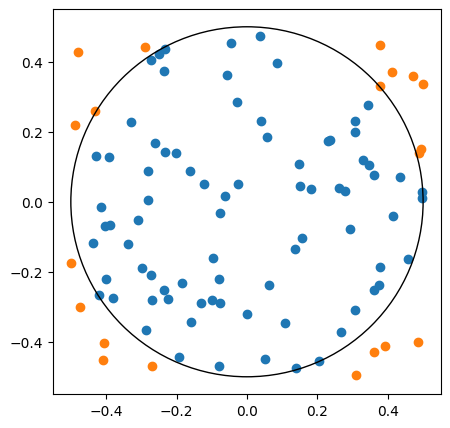

In [4]:
estimatePI(n_trials=100)

:::{admonition} Exercise 4
:class: exercise
Perform the $\pi$ estimation for 1000, 100000 and 1000000 trials. Take a screenshot of these estimations and include them in your report (e.g of the python plots). What happens to the accuracy of the $\pi$ estimation when going from 1000 to 1000000 trials and why?
:::

The accuracy improves because of the Law of Large Numbers—as the number of samples increases, the statistical estimate converges to the true value. Random fluctuations diminish with more trials, leading to a more stable and precise estimation of $\pi$.

3.1600000000


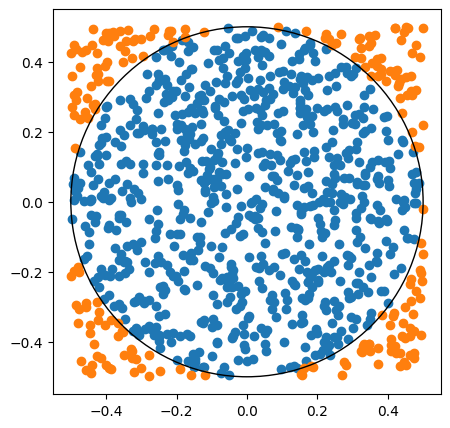

In [5]:
estimatePI(int(1e3))

3.1397200000


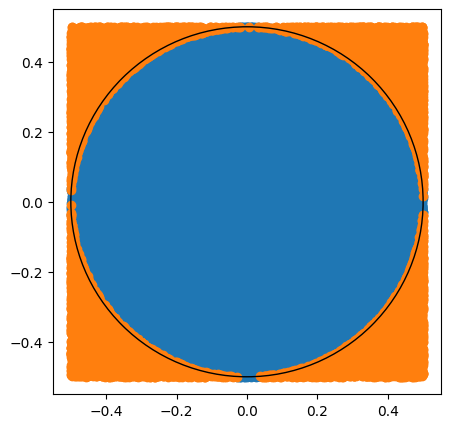

In [6]:
estimatePI(int(1e5))

3.1401520000


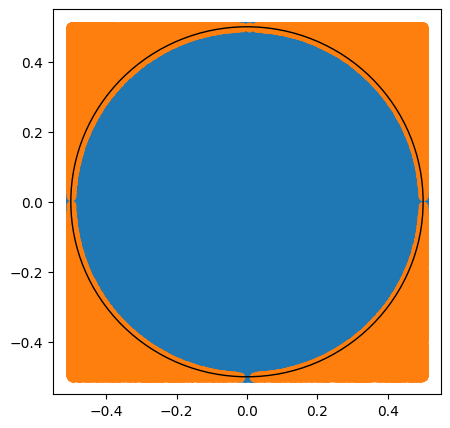

In [7]:
estimatePI(int(1e6))

**Everything working correctly?**

Then, lets get a bit more fancy and allow changing the number of trials interactively.

The below code provides an interactive widget with a slider that will redraw the plot once you change the slider. 



In [8]:
interact(estimatePI, n_trials=widgets.IntSlider(min=2, max=100000, step=1000, value=1000))

interactive(children=(IntSlider(value=1000, description='n_trials', max=100000, min=2, step=1000), Output()), …

<function __main__.estimatePI(n_trials=10)>

:::{admonition} Exercise 5
:class: exercise
What happens to the estimation of $\pi$ when the circle origin is changed? Why?
:::

inaccurate or even biased, depending on the sampling method.
1. If the circle is not entirely within the square, some parts may extend beyond the boundaries. This distorts the ratio of points inside the circle to those inside the square, leading to incorrect estimations.
2. The Monte Carlo method assumes uniform random sampling across the square. When the circle is off-center, the symmetry is broken, and the probability of points landing inside the circle no longer follows the expected distribution.

To maintain accuracy, you must ensure that:

1. The entire circle remains within the square.
2. The random sampling properly accounts for the new position.
3. The method is adapted to integrate only within the visible part of the circle if it extends beyond the square.

:::{admonition} Exercise 6
:class: exercise
What happens to the accuracy of the estimation when you increase the square size, or decrease the circle size? Is there an optimal ratio between the square side ($l$) and the circle diameter ($d$)?
:::


Increasing $l$ (or decreasing $r$), the ratio circle area/ square area decreases which means fewer random points fall inside the circle, meaning fewer samples contribute to estimating $\pi$. This increases variance in the estimation, reducing accuracy. More trials are needed to maintain the same level of accuracy. Fig \ref{fig:best_pi} shows absolute error versus $r$ of circle. We can observe that the best $r$ is $0.5$ (if $l=1$) i.e. $r = l/2$ gives the best approximation for $\pi$.

In [9]:
import numpy as np
np.random.seed(42)

def estimatePIFast(r = 0.5, l = 1.0, n_expt=1, n_trials=10):
    x = np.random.uniform(-l/2, l/2, (n_expt, n_trials))
    y = np.random.uniform(-l/2, l/2, (n_expt, n_trials))
    pi = 4 * np.sum(x**2 + y**2 <= r**2, axis=1) / n_trials
    return np.array([np.mean(pi), np.std(pi)])

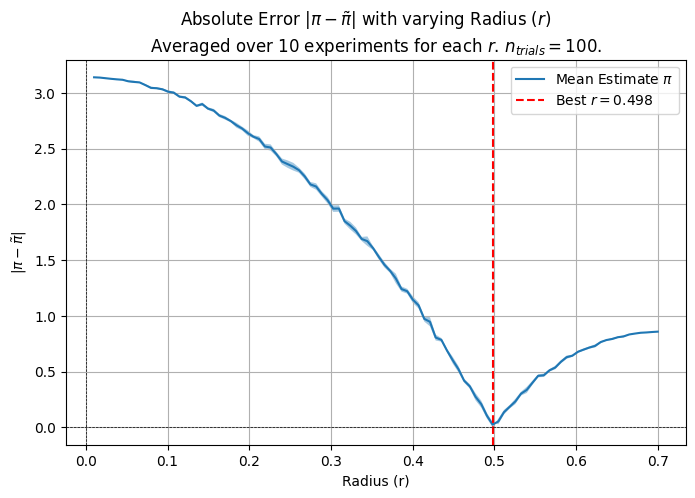

In [10]:
# Plotting

radius = np.linspace(0.7, 0.01, 100, 100)
pis = np.array([estimatePIFast(r, 1.0, 10, 1000) for r in radius])

best_r = radius[np.argmin(np.abs(np.pi - pis[:, 0]))]
plt.figure(figsize=(8, 5))
plt.plot(radius, np.abs(np.pi - pis[:, 0]), label="Mean Estimate $\pi$")
plt.fill_between(radius, np.abs(np.pi - pis[:, 0] + pis[:, 1]/2), np.abs(np.pi - pis[:, 0] - pis[:, 1]/2), alpha=0.4)
plt.suptitle(r"Absolute Error $|\pi - \tilde{\pi}|$ with varying Radius ($r$)")
plt.title("Averaged over 10 experiments for each $r$. $n_{trials} = 100$.")
plt.xlabel("Radius (r)")
plt.axvline(best_r, linestyle='--', color='red', label=r"Best $r = {}$".format(np.around(best_r, 3)))
plt.ylabel(r"$|\pi - \tilde{\pi}|$")
plt.axhline(0, color="black", lw=0.5, ls="--")  # x=0 line
plt.axvline(0, color="black", lw=0.5, ls="--")  # y=0 line
plt.grid()
plt.legend()
# plt.savefig("estimate_pi_varying_r.png")
plt.show()

:::{admonition} Exercise 7
:class: exercise
In our code we set the random seed (`r.seed()`) once in the first cell, but then it is unchanged. It means that the first time you run the MC code, the random number set as seed was used for the extraction, but then the later extractions do not start from that seed anymore. What happens if you use the same seed for the pseudo random number generator (PRNG) each time you start the MC code? And what would happen if you would use the same seed for each random number extraction? You can read up more details in [Appendix: Random and Pseudo-random Numbers](https://lcbc-epfl.github.io/mdmc-public/Ex1/prng.html). 
*Hint*: To get an idea, you can either edit the MC code, or you can also write a piece of code to check how the numbers generated depend on the seed set. 
:::

If you use the same seed every time you start the MC code, the PRNG will generate the same sequence of random numbers each time the program is executed. This means that, regardless of how many times you run the simulation, the same "random" sequence will be used for each trial, leading to identical results each time.

If you set the same seed before every random number extraction (i.e., before each random number generation step), the PRNG will reset to the same state every time it generates a number. As a result, it will generate the same sequence of random numbers for each extraction step. This would defeat the purpose of using random numbers in your simulation. For example, if you extract a random number multiple times, the outcome would always be the same sequence of numbers. This would lead to repeated, non-random behavior and invalidate your Monte Carlo estimation, as every trial would be identical.

[read this](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/generating-random-numbers.html)

In [19]:
# Set the seed to a fixed value
seed_value = 42

# Generate random numbers with the same seed multiple times
r.seed(seed_value)
numbers_1 = [r.random() for _ in range(5)]
numbers_2 = [r.random() for _ in range(5)]
r.seed(seed_value)
numbers_3 = [r.random() for _ in range(5)]

s
print("Random numbers from first sequence: ", numbers_1)
print("Random numbers from second sequence: ", numbers_2)
print("Random numbers from third sequence: ", numbers_3)

Random numbers from first sequence:  [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124]
Random numbers from second sequence:  [0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, 0.029797219438070344]
Random numbers from third sequence:  [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124]
